In [1]:
from load_data import load_cicids_2017
X_train, X_valid, y_train, y_valid = load_cicids_2017()

In [2]:
from collections import Counter
Counter(y_train)

Counter({0: 57510,
         2: 9000,
         4: 9000,
         3: 9000,
         10: 9000,
         7: 5337,
         6: 4846,
         5: 4705,
         11: 2897,
         1: 1753,
         12: 1323,
         14: 586,
         9: 32,
         13: 18,
         8: 9})

In [3]:
from src.data_distribution import DataDistribution
data_distribution = DataDistribution()
x_data, y_data, _, _ = data_distribution.get_data()

In [5]:
print(y_data)
# print(type(y_data))

[array([2, 2, 0, ..., 2, 2, 0]), array([4, 4, 0, ..., 4, 4, 0]), array([3, 3, 0, ..., 3, 3, 0]), array([10, 10,  0, ..., 10, 10,  0]), array([0, 7, 0, ..., 0, 7, 0]), array([6, 0, 0, ..., 0, 6, 0]), array([5, 5, 0, ..., 0, 5, 0]), array([ 0, 12, 12, ..., 12, 12, 12]), array([ 0,  0, 11, ...,  0,  0, 11]), array([0, 1, 0, ..., 1, 1, 0]), array([ 0, 14,  0, ...,  0,  0,  0]), array([0, 0, 9, 0, 9, 0, 9, 9, 9, 0, 0, 9, 0, 9, 0, 0, 9, 9, 0, 9, 9, 0,
       9, 0, 9, 0, 0, 0, 9, 9, 0, 0, 9, 9, 9, 9, 0, 9, 0, 0, 0, 0, 9, 0,
       0, 9, 9, 9, 0, 0, 0, 9, 0, 9, 9, 9, 0, 9, 9, 0, 9, 9, 0, 0]), array([ 0, 13,  0,  0, 13,  0,  0, 13, 13, 13, 13,  0, 13, 13,  0, 13,  0,
       13, 13, 13,  0, 13,  0, 13,  0,  0,  0, 13,  0,  0,  0, 13,  0, 13,
       13,  0]), array([8, 8, 8, 8, 8, 0, 0, 0, 0, 8, 0, 0, 8, 0, 8, 0, 0, 8])]


In [ ]:
import models
import requests
from tqdm import tqdm
import numpy as np

def __init__(self, dataset_x, dataset_y, epoch_number, learning_rate, batch):
    self.dataset_x = dataset_x
    self.dataset_y = dataset_y
    self.epoch_number = epoch_number
    self.learning_rate = learning_rate
    self.batch = batch

def train(self, initial_weights):
    model = models.get_cicids_model()
    model.set_weights(initial_weights)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(self.dataset_x, self.dataset_y, epochs=self.epoch_number, batch_size=self.batch, verbose = 0)
    output_weights = model.get_weights()
    loss = history.history['loss'][-1]
    accuracy = history.history['accuracy'][-1]
    return output_weights, loss, accuracy

def train_server_without_parallelization(rounds, clients, global_weights, server_url):
    training_accuracy = []
    loss_list = []

    for round in range(1, rounds + 1):
        print(f"Training round {round}")
        client_weights = []
        client_accuracies = []

        # Use tqdm for animated progress bar with `#` as the loading bar character
        for i, client in enumerate(clients):
        with tqdm(total=100, desc=f"Client {i+1} training", bar_format="{l_bar}{bar}| {n_fmt}/{total_fmt} {postfix}", ascii=True) as pbar:
            weights, loss, accuracy = client.train(global_weights)
            client_weights.append(weights)
            client_accuracies.append(accuracy)

                # Update the progress bar (assuming each training is 100% done after each loop iteration)
                pbar.update(100)
                pbar.set_postfix_str(f"accuracy = {accuracy:.4f}, loss = {loss:.4f}")
            
            with open("client_logs.txt", "a") as file:
                file.write(f"Client {i+1} accuracy = {accuracy:.4f}, loss = {loss:.4f}"+"\n")
        
        with open("client_logs.txt", "a") as file:
            file.write("\n")

        client_weights_list = [[w.tolist() for w in client] for client in client_weights]
        response = requests.post(f'{server_url}/update_weights', json={'weights': client_weights_list, 'client_accuracy': client_accuracies})

        updated_global = response.json()

        global_weights = [np.array(w) for w in updated_global['weights']]
        print(f"Performing federated averaging. Round = {updated_global['round']}, Accuracy = {updated_global['accuracy']}, Loss = {updated_global['loss']}")

        training_accuracy.append(updated_global['accuracy'])
        loss_list.append(updated_global['loss'])

    return training_accuracy, loss_list

In [15]:
from collections import Counter
for row in y_train_list:
    print(Counter(row))

Counter({2: 9000, 0: 9000})
Counter({4: 9000, 0: 9000})
Counter({3: 9000, 0: 9000})
Counter({10: 9000, 0: 9000})
Counter({0: 5337, 7: 5337})
Counter({6: 4846, 0: 4846})
Counter({5: 4705, 0: 4705})
Counter({0: 1323, 12: 1323})
Counter({0: 2897, 11: 2897})
Counter({0: 1753, 1: 1753})
Counter({0: 586, 14: 586})
Counter({0: 32, 9: 32})
Counter({0: 18, 13: 18})
Counter({8: 9, 0: 9})


In [26]:
import pandas as pd
df = pd.read_csv("placement 23-24.csv", header=None)
df.columns=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]

In [46]:
df["10"]

0        1592000
1        1200000
2        1000000
3        1200000
4        1200000
          ...   
1028     1200000
1029     1500000
1030    8,00,000
1031     1311258
1032     1800000
Name: 10, Length: 1033, dtype: object

In [57]:
df["1"] = df["1"].str.strip()

# List of values to exclude from the 1st column (exact match)
exclude_values = ["M.TECH", "MS", "LLB", "M.SC(5YR)", "PHD", "B.ARCH", "M.SC(2YR)", "MCP"]

# Filter rows that do not contain exact matches from exclude_values
df = df[~df["1"].isin(exclude_values)]

df["10"] = pd.to_numeric(df["10"].astype(str).str.replace(",", ""), errors='coerce')


# Print rows where the 10th column is greater than or equal to 100,000
filtered_df = df[df["10"] >= 100000]
filtered_df = filtered_df.reset_index(drop=True)

print(filtered_df)

               1   2          3                                             4  \
0         B.TECH  ME  20ME10030                        MECHANICAL ENGINEERING   
1         B.TECH  MT  20MT10010         METALLURGICAL & MATERIALS ENGINEERING   
2         B.TECH  AG  20AG10036             AGRICULTURAL AND FOOD ENGINEERING   
3    DUAL DEGREE  EC  19EC39029  ELECTRONICS & ELECTRICAL COMMUNICATION ENGG.   
4         B.TECH  ME  20MF10018                        MECHANICAL ENGINEERING   
..           ...  ..        ...                                           ...   
580       B.TECH  EE  20IE10002                        ELECTRICAL ENGINEERING   
581       B.TECH  EE  20IE10010                        ELECTRICAL ENGINEERING   
582       B.TECH  EE  20IE10043                        ELECTRICAL ENGINEERING   
583       B.TECH  CH  20CH10093                          CHEMICAL ENGINEERING   
584  DUAL DEGREE  IM  19MF3IM13            INDUSTRIAL AND SYSTEMS ENGINEERING   

                           

In [58]:
df["6"].unique()

array(['ACCENTURE', 'TVS MOTORS COMPANY LTD', 'BLUE STAR LTD',
       'CAMS (COMPUTER AGE MANAGEMENT SERVICES LIMITED)',
       'ACCENTURE JAPAN LTD.', 'GLEAN',
       'CAPITAL ONE SERVICES (INDIA) PVT LTD', 'ARPWOOD CAPITAL', 'ITC',
       'OLA', 'DOCYT INDIA PRIVATE LIMITED',
       'ZL TECHNOLOGIES INDIA PVT LTD',
       'JAGUAR LAND ROVER TECHNOLOGY AND BUSINESS SERVICE INDIA LIMITED',
       'PROCTER AND GAMBLE',
       'INDUS INSIGHTS AND ANALYTICAL SERVICES PVT. LTD.',
       'PLUTUS RESEARCH PVT LTD', 'EXL SERVICE', 'DATABRICKS',
       'SPRINKLR INDIA PVT. LTD.', 'FLIPKART',
       'ASPER.AI ( A FRACTAL COMPANY)', 'HSBC (INDIA)', 'GROWW', 'NVIDIA',
       'NAVI TECHNOLOGIES PVT. LTD.', 'AXIS BANK',
       'SAMSUNG R&D INSTITUTE - BANGLORE',
       'AXXELA RESEARCH & ANALYTICS PVT. LTD.', 'DA VINCI', 'BAJAJ AUTO',
       'NOMURA', 'BANK OF AMERICA',
       'BEEHYV SOFTWARE SOLUTIONS PVT. LTD.,', 'NK SECURITIES RESEARCH',
       'QUALCOMM INDIA PVT LTD', 'BHARAT PETROLEUM CORP. 

In [53]:
filtered_df["1"].unique()

array(['B.TECH', 'LLB', 'DUAL DEGREE', 'M.SC(5YR)', 'PHD', 'B.ARCH',
       'M.SC(2YR)', 'MCP'], dtype=object)

In [24]:
"90" > "100"

True

In [8]:
len(df.columns)

12

In [ ]:
import os

from src.plotting import plotter1, plotter2, plotter3
cur_dir_path = "C://Users//swapn//Downloads//Federated-Learning Git//npy results"
plotter1(cur_dir_path)
plotter2(cur_dir_path)

In [5]:
from load_data import *
X_combined, X_valid, y_combined, y_valid = load_cicids_2017()
    
# Combine X_train and y_train into a single DataFrame
X_combined_df = pd.DataFrame(X_combined)
X_combined_df['Label'] = y_combined

# Separate malicious and benign samples
X_malicious = X_combined_df[X_combined_df['Label'] != 0]
X_benign = X_combined_df[X_combined_df['Label'] == 0]

valid_dist = Counter(y_valid)

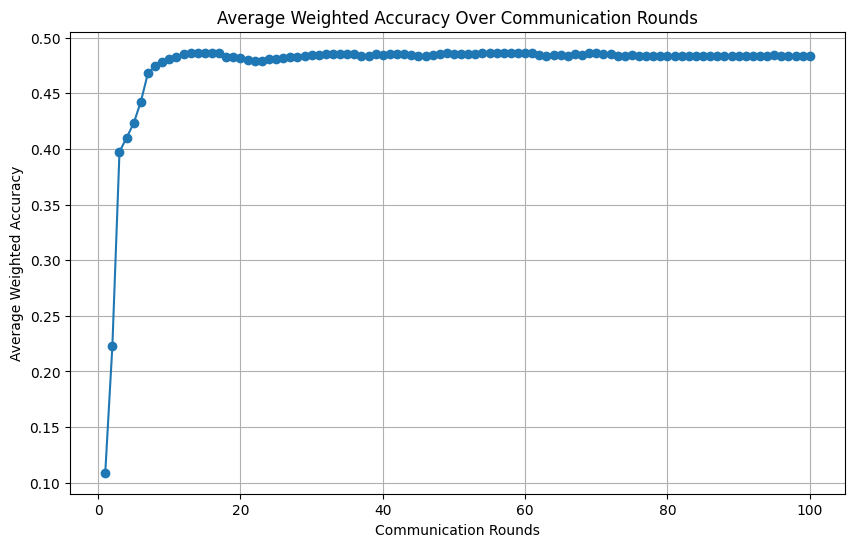

In [6]:
plotter3(cur_dir_path, valid_dist)

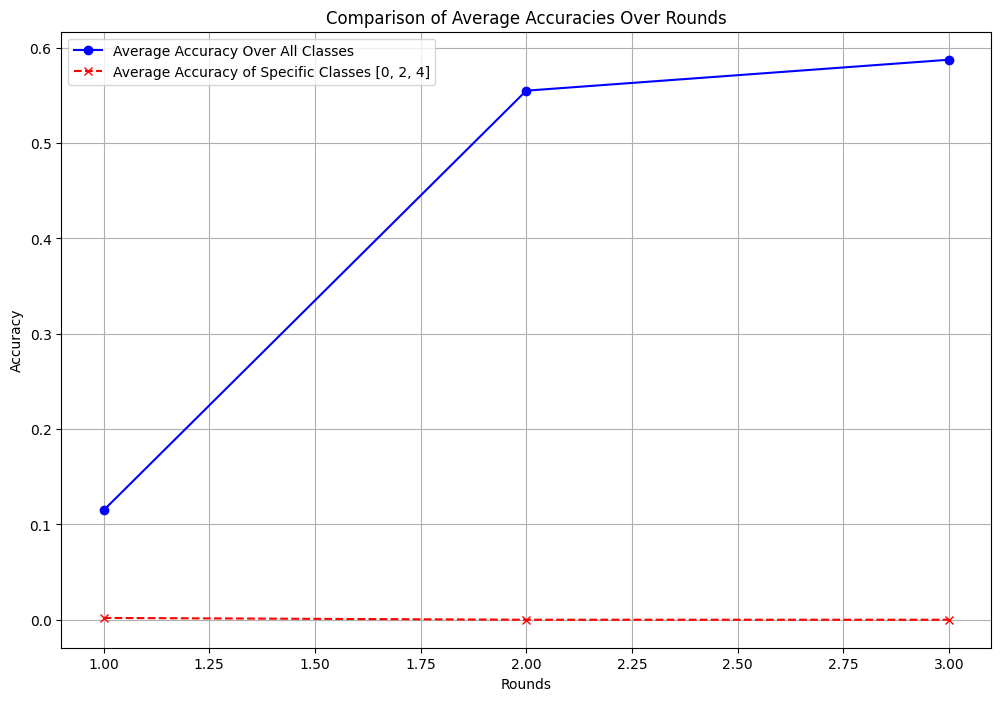

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Load the confusion matrices
confusion_matrices = np.load('confusion_matrices.npy')

# Indices for specific classes you are interested in
specific_classes = [8, 9, 13]

# Initialize lists to store accuracies
average_accuracies = []
average_specific_class_accuracies = []

# Calculate accuracies
for cm in confusion_matrices:
    # Overall average accuracy
    overall_accuracy = np.trace(cm) / np.sum(cm)
    average_accuracies.append(overall_accuracy)

    # Accuracies for specific classes
    class_accuracies = []
    for cls in specific_classes:
        class_accuracy = cm[cls, cls] / np.sum(cm[:, cls]) if np.sum(cm[:, cls]) != 0 else 0
        class_accuracies.append(class_accuracy)
    
    # Calculate the average accuracy for specific classes for this round
    average_accuracy_this_round = np.mean(class_accuracies)
    average_specific_class_accuracies.append(average_accuracy_this_round)

# Rounds (assuming one matrix per round)
rounds = list(range(1, len(confusion_matrices) + 1))

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(rounds, average_accuracies, label='Average Accuracy Over All Classes', marker='o', linestyle='-', color='blue')
plt.plot(rounds, average_specific_class_accuracies, label='Average Accuracy of Specific Classes [0, 2, 4]', marker='x', linestyle='--', color='red')
plt.xlabel('Rounds')
plt.ylabel('Accuracy')
plt.title('Comparison of Average Accuracies Over Rounds')
plt.legend()
plt.grid(True)
plt.show()


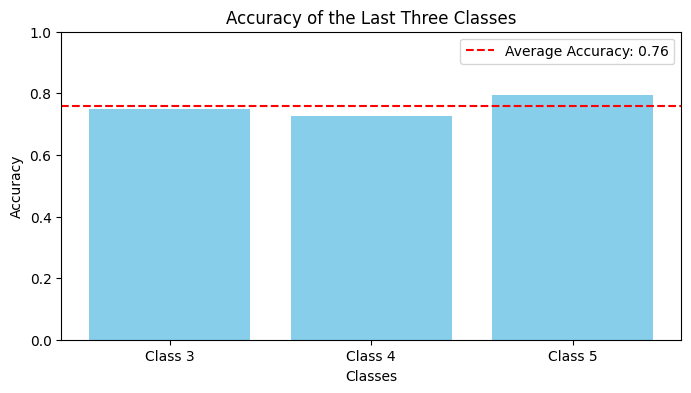

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Example confusion matrix for a 5-class classification problem
confusion_matrix = np.array([
    [20, 1, 0, 2, 2],
    [0, 30, 0, 5, 0],
    [1, 0, 15, 1, 3],
    [3, 6, 2, 40, 4],
    [0, 2, 4, 3, 35]
])

# Calculate the accuracy for the last three classes
def calculate_last_three_classes_accuracy(cm):
    num_classes = cm.shape[0]
    accuracies = []
    # Start from the third-last class to the last class
    for i in range(num_classes - 3, num_classes):
        true_positives = cm[i, i]
        total_predictions = np.sum(cm[i, :])
        accuracy = true_positives / total_predictions if total_predictions != 0 else 0
        accuracies.append(accuracy)
    return accuracies

# Get accuracies for the last three classes
last_three_accuracies = calculate_last_three_classes_accuracy(confusion_matrix)

# Calculate the average accuracy of these classes
average_accuracy = np.mean(last_three_accuracies)

# Plotting
classes = [f'Class {i+1}' for i in range(len(confusion_matrix)-3, len(confusion_matrix))]
plt.figure(figsize=(8, 4))
plt.bar(classes, last_three_accuracies, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Accuracy of the Last Three Classes')
plt.ylim(0, 1)  # Limit the y-axis for better comparison
plt.axhline(y=average_accuracy, color='r', linestyle='--', label=f'Average Accuracy: {average_accuracy:.2f}')
plt.legend()
plt.show()


In [36]:
import numpy as np

# Example confusion matrix
confusion_matrix = confusion_matrices[0]

# Function to calculate total samples by true labels
def total_samples_by_true_label(cm, class_index):
    return np.sum(cm[class_index, :])

# Function to calculate total samples by predicted labels
def total_samples_by_predicted_label(cm, class_index):
    return np.sum(cm[:, class_index])

# Example: Calculate for Class 1 (index 0)
for i in range(14):
    total_true_samples_class_1 = total_samples_by_true_label(confusion_matrix, i)
    total_predicted_samples_class_1 = total_samples_by_predicted_label(confusion_matrix, i)

    print([total_true_samples_class_1, total_predicted_samples_class_1])


[6391, 2699]
[195, 213]
[1000, 724]
[1000, 574]
[1000, 476]
[523, 2041]
[539, 633]
[594, 826]
[2, 358]
[4, 574]
[1000, 438]
[322, 751]
[147, 451]
[3, 1259]


In [53]:
k = 15
dist_y = Counter(y_valid)
sorted(dist_y, key=dist_y.get)[:k]

[8, 13, 9, 14, 12, 1, 11, 5, 6, 7, 2, 4, 3, 10, 0]

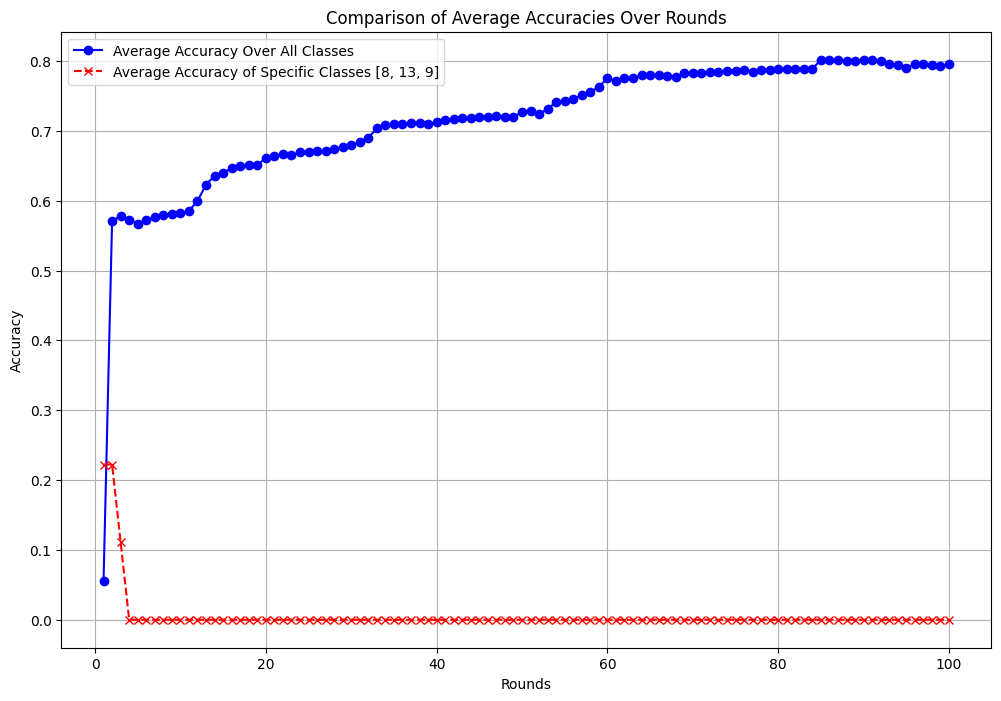

In [63]:
import os

def plotter4(dir_path="C:/Users/swapn/Downloads/Federated-Learning Git/", smallest_k_ids=[8, 13, 9, 14, 12, 1, 11, 5, 6, 7, 2, 4, 3, 10, 0][:3],
            #   experiment_name = "adapt_with_expo"):
            experiment_name = "adaptive_without_expo"):
    # Load the confusion matrices
    confusion_matrices = np.load(os.path.join(dir_path, f"{experiment_name}/npy results/confusion_matrices.npy"))

    # Indices for specific classes you are interested in
    specific_classes = smallest_k_ids

    # Initialize lists to store accuracies
    average_accuracies = []
    average_specific_class_accuracies = []

    # Calculate accuracies
    for cm in confusion_matrices:
        # Overall average accuracy
        overall_accuracy = np.trace(cm) / np.sum(cm)
        average_accuracies.append(overall_accuracy)

        # Accuracies for specific classes
        numerator = 0
        denominator = 0
        
        for clss in specific_classes:
            cls = clss
            numerator += cm[cls, cls]
            denominator += np.sum(cm[cls, :])

            # print(numerator/denominator)
        
        # Calculate the average accuracy for specific classes for this round
        average_accuracy_this_round = numerator / denominator if denominator != 0 else 0
        average_specific_class_accuracies.append(average_accuracy_this_round)

    # Rounds (assuming one matrix per round)
    rounds = list(range(1, len(confusion_matrices) + 1))

    # Plot the results
    plt.figure(figsize=(12, 8))
    plt.plot(rounds, average_accuracies, label='Average Accuracy Over All Classes', marker='o', linestyle='-', color='blue')
    plt.plot(rounds, average_specific_class_accuracies, label=f'Average Accuracy of Specific Classes {str(smallest_k_ids)}', marker='x', linestyle='--', color='red')
    plt.xlabel('Rounds')
    plt.ylabel('Accuracy')
    plt.title('Comparison of Average Accuracies Over Rounds')
    plt.legend()
    plt.grid(True)

    output_dir = f"{experiment_name}/metrics_plots"
    os.makedirs(output_dir, exist_ok=True)

    # Save the figure
    # output_path = os.path.join(output_dir, f'last_k_comparision.png')
    # plt.savefig(output_path)

    plt.show()

plotter4()


In [30]:
len(X_valid)

12786

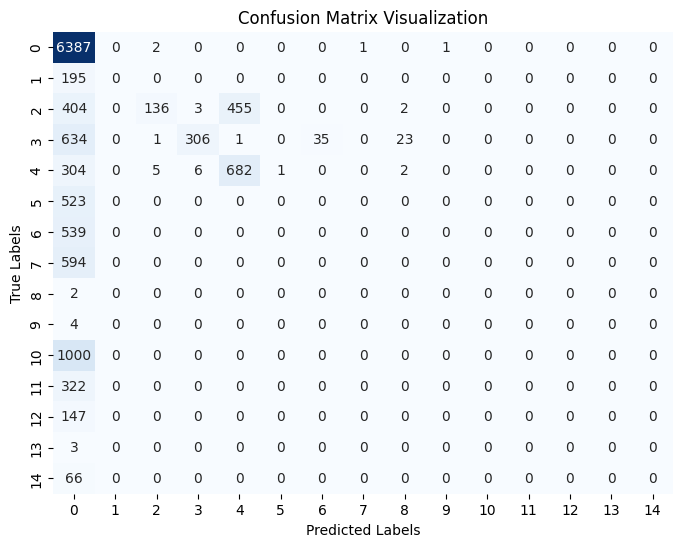

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample confusion matrix and labels
confusion_matrix = confusion_matrices[-1]

class_labels = range(0, 15)

def plot_confusion_matrix(cm, labels):
    # Create a heatmap from the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels)

    # Add labels and title
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix Visualization')

    # Display the plot
    plt.show()

# Call the function with the sample data
plot_confusion_matrix(confusion_matrix, class_labels)


In [85]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Define your model
def get_cicids_model():
    model = keras.models.Sequential([
        keras.Input(shape=[78,]),
        keras.layers.Dense(200, activation='tanh'),
        keras.layers.Dense(100, activation='tanh'),
        keras.layers.Dense(50, activation='tanh'),
        keras.layers.Dense(15, activation='softmax')
    ])
    return model

# Process the data structures
def process_data(x_data, y_data, x_test, y_test):
    processed_x_train = []
    processed_y_train = []

    # Process x_data and y_data for each client
    for i in range(len(x_data)):
        client_x = x_data[i]
        client_y = y_data[i]

        # Flatten client_x if necessary
        if isinstance(client_x, np.ndarray) and client_x.dtype == object:
            client_x = np.vstack(client_x)
        elif isinstance(client_x, list):
            client_x = np.vstack(client_x)
        
        # Ensure client_y is a flat array
        client_y = np.array(client_y).flatten()

        processed_x_train.append(client_x)
        processed_y_train.append(client_y)

    # Process x_test and y_test
    if isinstance(x_test, np.ndarray) and x_test.dtype == object:
        x_test = np.vstack(x_test)
    elif isinstance(x_test, list):
        x_test = np.vstack(x_test)

    y_test = np.array(y_test).flatten()

    return processed_x_train, processed_y_train, x_test, y_test

# Function to train client models
def train_client_models(processed_x_train, processed_y_train):
    client_models = []
    num_clients = len(processed_x_train)
    for i in range(num_clients):
        print(f"\nTraining model for client {i+1}")
        model = get_cicids_model()
        model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.fit(processed_x_train[i], processed_y_train[i], epochs=2, batch_size=64, verbose=1)
        client_models.append(model)
    return client_models

# Main code
if __name__ == "__main__":
    # Load your actual data using DataDistribution
    from src.data_distribution import DataDistribution
    data_distribution = DataDistribution()
    x_data, y_data, x_test, y_test = data_distribution.get_data()

    # Process the data
    processed_x_train, processed_y_train, x_test, y_test = process_data(x_data, y_data, x_test, y_test)

    # Verify shapes
    num_clients = len(processed_x_train)
    for i in range(num_clients):
        print(f"Client {i+1} x_train shape: {processed_x_train[i].shape}, y_train shape: {processed_y_train[i].shape}")
    print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

    # Initialize weights inversely proportional to the number of samples per client
    nk = np.array([len(processed_x_train[i]) for i in range(num_clients)])
    inverse_nk = 1.0 / nk
    wi_init = inverse_nk / np.sum(inverse_nk)
    print(f"Initial weights wi: {wi_init}")

    # Parameterize weights using ai, where wi = softmax(ai)
    ai = tf.Variable(np.log(wi_init), dtype=tf.float32)

    # Train client models
    client_models = train_client_models(processed_x_train, processed_y_train)

    # Prepare validation data as tensors
    X_valid = tf.convert_to_tensor(x_test, dtype=tf.float32)
    y_valid = tf.convert_to_tensor(y_test, dtype=tf.int32)

    # Number of rounds
    num_rounds = 100

    # Set up optimizer for updating ai
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)

    # Precompute client model outputs on validation data
    client_predictions = []
    for model in client_models:
        preds = model(X_valid, training=False)  # Shape: (num_samples, num_classes)
        client_predictions.append(preds)

    # Stack client predictions: Shape (num_clients, num_samples, num_classes)
    client_predictions = tf.stack(client_predictions, axis=0)

    # Federated learning rounds
    for round_num in range(num_rounds):
        print(f"\n--- Round {round_num + 1} ---")
        with tf.GradientTape() as tape:
            # Ensure ai is being watched
            tape.watch(ai)

            # Compute weights wi from ai using softmax
            wi = tf.nn.softmax(ai)  # Shape: (num_clients,)
            print(f"Weights wi: {wi.numpy()}")

            # Reshape wi for broadcasting: (num_clients, 1, 1)
            wi_reshaped = tf.reshape(wi, (num_clients, 1, 1))

            # Aggregate client predictions using weights wi
            # y_pred shape: (num_samples, num_classes)
            y_pred = tf.reduce_sum(wi_reshaped * client_predictions, axis=0)

            # Compute loss on validation data
            loss = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y_valid, y_pred))
            print(f"Validation Loss: {loss.numpy():.4f}")

        # Compute gradients of loss with respect to ai
        gradients = tape.gradient(loss, ai)
        optimizer.apply_gradients([(gradients, ai)])

    # Final weights
    wi = tf.nn.softmax(ai).numpy()
    print(f"\nFinal weights wi: {wi}")

    # Aggregate client models using final weights to create the global model
    # Note: Since we can't set model weights directly as functions of ai, we can proceed to evaluate the aggregated model by directly using the aggregated predictions

    # Recompute the aggregated predictions with final weights
    wi_reshaped = tf.reshape(wi, (num_clients, 1, 1))
    y_pred = tf.reduce_sum(wi_reshaped * client_predictions, axis=0)  # Shape: (num_samples, num_classes)

    # Evaluate the final global model
    y_pred_labels = tf.argmax(y_pred, axis=1).numpy()
    y_valid_np = y_valid.numpy()

    # Compute metrics
    accuracy = np.mean(y_pred_labels == y_valid_np)
    print(f"\nFinal Global Model - Accuracy: {accuracy * 100:.2f}%")

    cm = confusion_matrix(y_valid_np, y_pred_labels)
    print("\nConfusion Matrix:")
    print(cm)

    # If you need per-class metrics
    precision_per_class = precision_score(y_valid_np, y_pred_labels, average=None, zero_division=0)
    recall_per_class = recall_score(y_valid_np, y_pred_labels, average=None, zero_division=0)
    f1_per_class = f1_score(y_valid_np, y_pred_labels, average=None, zero_division=0)

    print("\nPrecision per class:")
    print(precision_per_class)
    print("\nRecall per class:")
    print(recall_per_class)
    print("\nF1-score per class:")
    print(f1_per_class)


Client 1 x_train shape: (18000, 78), y_train shape: (18000,)
Client 2 x_train shape: (18000, 78), y_train shape: (18000,)
Client 3 x_train shape: (18000, 78), y_train shape: (18000,)
Client 4 x_train shape: (18000, 78), y_train shape: (18000,)
Client 5 x_train shape: (10674, 78), y_train shape: (10674,)
Client 6 x_train shape: (9692, 78), y_train shape: (9692,)
Client 7 x_train shape: (9410, 78), y_train shape: (9410,)
Client 8 x_train shape: (2646, 78), y_train shape: (2646,)
Client 9 x_train shape: (5794, 78), y_train shape: (5794,)
Client 10 x_train shape: (3506, 78), y_train shape: (3506,)
Client 11 x_train shape: (1172, 78), y_train shape: (1172,)
Client 12 x_train shape: (64, 78), y_train shape: (64,)
Client 13 x_train shape: (36, 78), y_train shape: (36,)
Client 14 x_train shape: (18, 78), y_train shape: (18,)
x_test shape: (12786, 78), y_test shape: (12786,)
Initial weights wi: [0.00054912 0.00054912 0.00054912 0.00054912 0.000926   0.00101982
 0.00105038 0.00373548 0.00170592 

In [66]:
from src.data_distribution import DataDistribution
data_distribution = DataDistribution()
x_data, y_data, x_test, y_test = data_distribution.get_data()


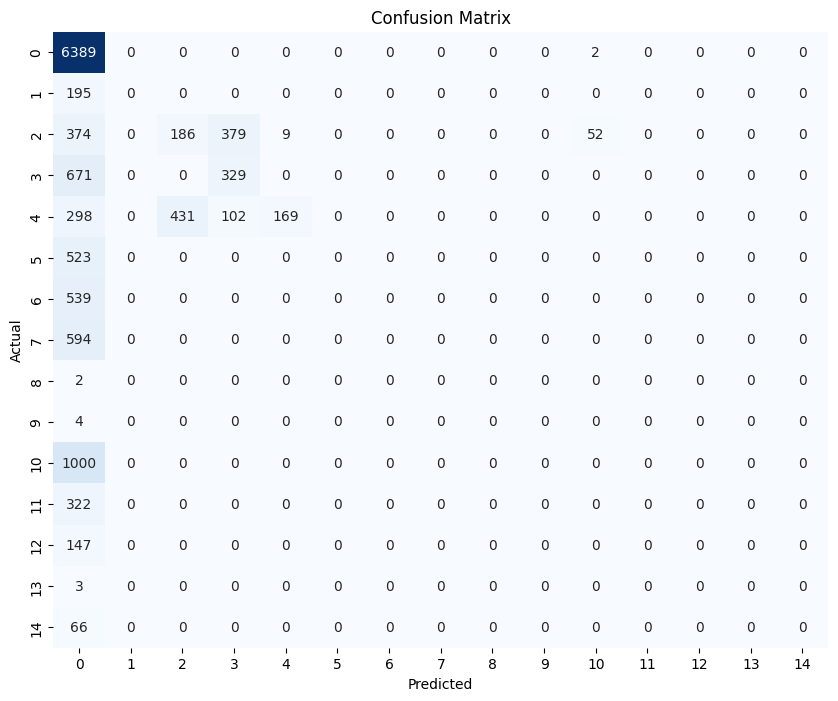

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the confusion matrix
conf_matrix = np.array([[6389, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
                        [195, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [374, 0, 186, 379, 9, 0, 0, 0, 0, 0, 52, 0, 0, 0, 0],
                        [671, 0, 0, 329, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [298, 0, 431, 102, 169, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [523, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [539, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [594, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [322, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [147, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [66, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [80]:
type(y_test[0])

numpy.int32

In [ ]:
list(numpy.ndarray(numpy.ndarray(numpy.float64)))

In [ ]:
list(numpy.ndarray(numpy.int32))

In [ ]:
numpy.ndarray(numpy.ndarray(numpy.float64))

In [ ]:
numpy.ndarray(numpy.int32)

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

# Assume client_models is a list of client model parameter tensors c_i
client_models = [c1, c2, ..., cn]
n = len(client_models)

# Use your initial weights w_i
initial_weights = torch.tensor([w1, w2, ..., wn], requires_grad=True)

# Define optimizer for w_i
optimizer = optim.Adam([initial_weights], lr=0.01)

for epoch in range(2):
    optimizer.zero_grad()
    
    # Compute normalized weights using softmax or your preferred method
    weights = torch.softmax(initial_weights, dim=0)
    
    # Aggregate client models to form global model g
    g = sum(weight * model for weight, model in zip(weights, client_models))
    
    # Compute loss L(g) using global model g
    loss = compute_loss(g, data_loader)
    
    # Backpropagate to compute gradients
    loss.backward()
    
    # Update coefficient weights w_i
    optimizer.step()


Training Round 1: 100%|##########| 100/100 , accuracy = 0.9603, loss = 0.1123
Training Round 2: 100%|##########| 100/100 , accuracy = 0.9649, loss = 0.0902
Training Round 3: 100%|##########| 100/100 , accuracy = 0.9668, loss = 0.0834
Training Round 4: 100%|##########| 100/100 , accuracy = 0.9678, loss = 0.0795
Training Round 5: 100%|##########| 100/100 , accuracy = 0.9687, loss = 0.0758
Training Round 6: 100%|##########| 100/100 , accuracy = 0.9696, loss = 0.0740
Training Round 7: 100%|##########| 100/100 , accuracy = 0.9707, loss = 0.0719
Training Round 8: 100%|##########| 100/100 , accuracy = 0.9706, loss = 0.0709
Training Round 9: 100%|##########| 100/100 , accuracy = 0.9713, loss = 0.0693
Training Round 10: 100%|##########| 100/100 , accuracy = 0.9716, loss = 0.0685
Training Round 11: 100%|##########| 100/100 , accuracy = 0.9725, loss = 0.0672
Training Round 12: 100%|##########| 100/100 , accuracy = 0.9730, loss = 0.0658
Training Round 13: 100%|##########| 100/100 , accuracy = 0.97

Training completed.
Accuracies per round: [0.9602577090263367, 0.964900553226471, 0.9667872190475464, 0.967839241027832, 0.9687348008155823, 0.9695607423782349, 0.9706736207008362, 0.9705780148506165, 0.9712735414505005, 0.9715604782104492, 0.9724559783935547, 0.9729863405227661, 0.972769021987915, 0.9730298519134521, 0.9734471440315247, 0.973281979560852, 0.9737862348556519, 0.9741166234016418, 0.9742035865783691, 0.9744383096694946, 0.9746817946434021, 0.9746643900871277, 0.9749600291252136, 0.9750121831893921, 0.9755077362060547, 0.9756903648376465, 0.9757512211799622, 0.9756121039390564, 0.9770205616950989, 0.9767597317695618, 0.9784290790557861, 0.9773944616317749, 0.9770205616950989, 0.9801592826843262, 0.9763771891593933, 0.9796897768974304, 0.9767162799835205, 0.9782812595367432, 0.9785073399543762, 0.9790811538696289, 0.9788811802864075, 0.9777074456214905, 0.9774379134178162, 0.9789246916770935, 0.9786290526390076, 0.9785073399543762, 0.9766119718551636, 0.9781421422958374, 0

c:\Users\swapn\Downloads\Federated-Learning Git\src\plotting.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


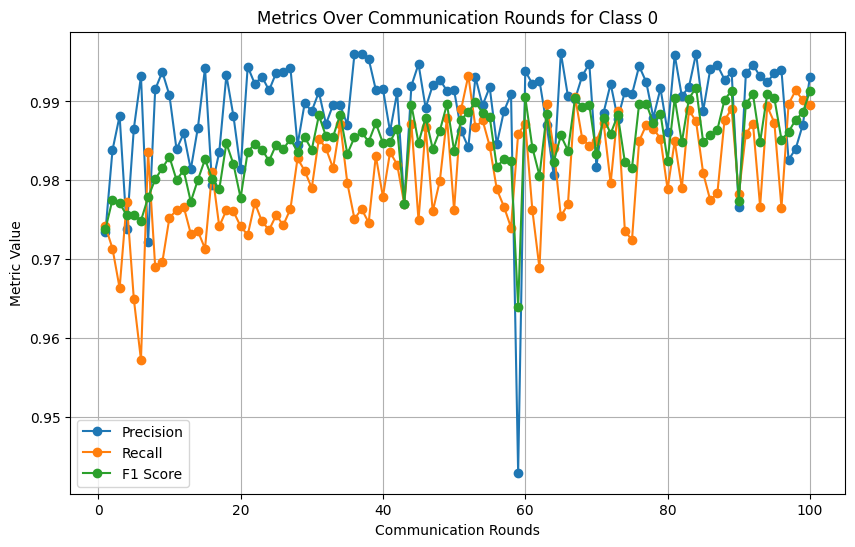

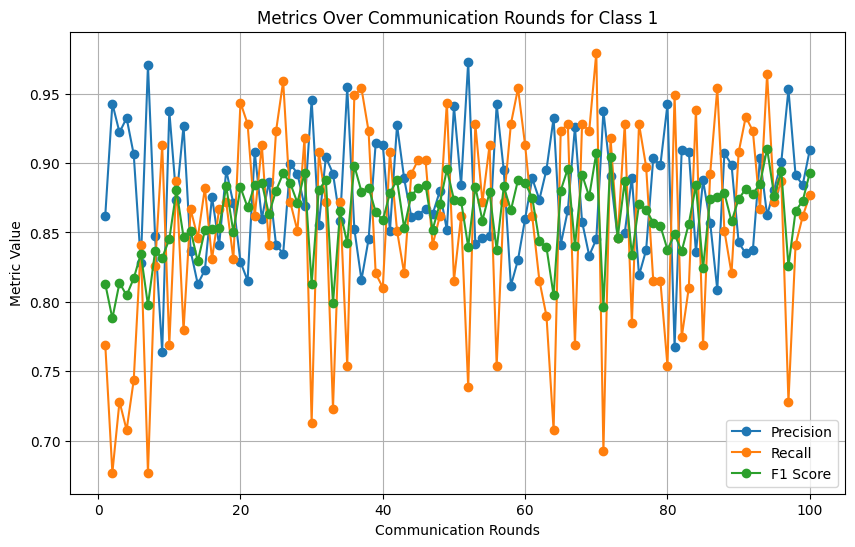

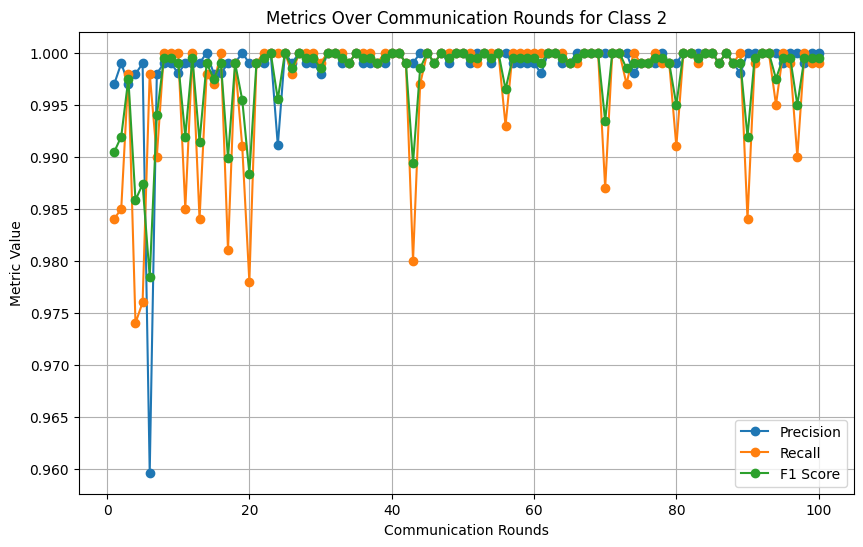

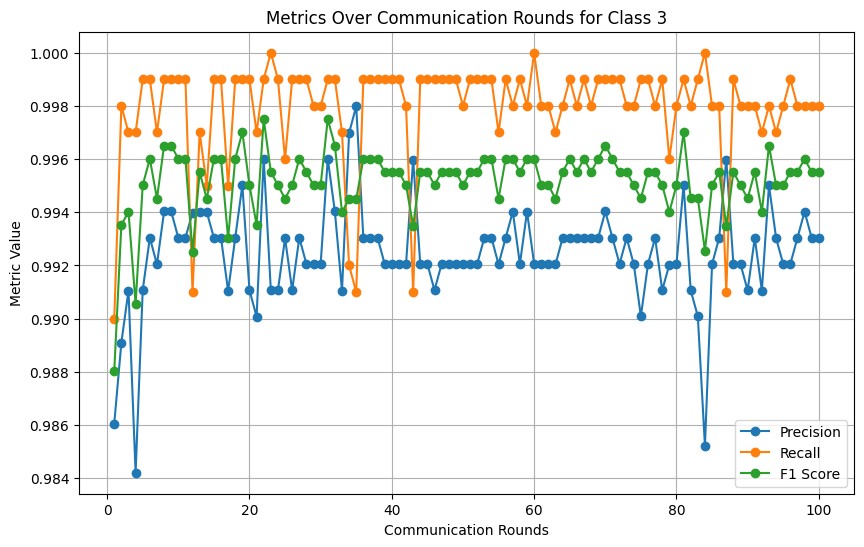

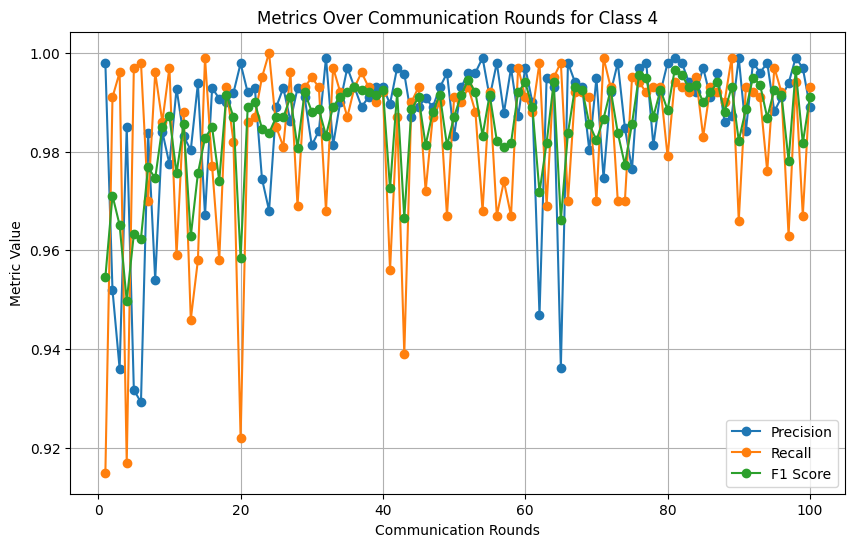

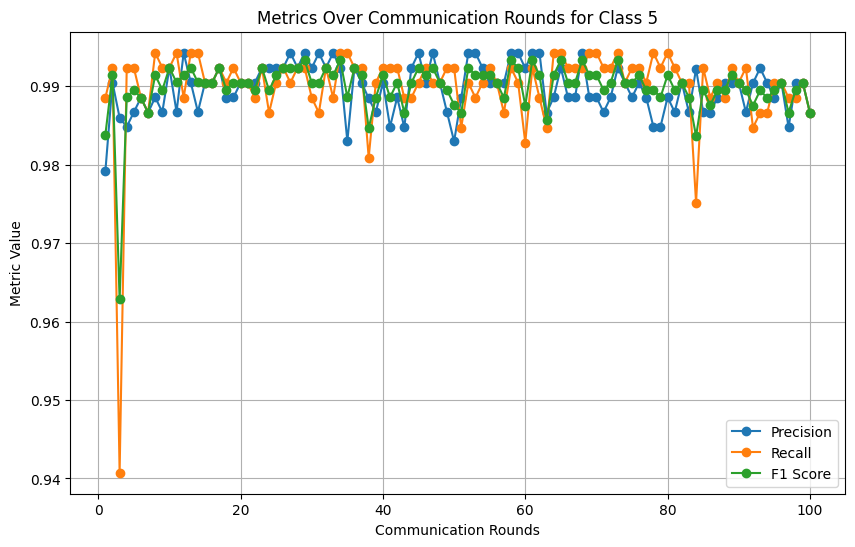

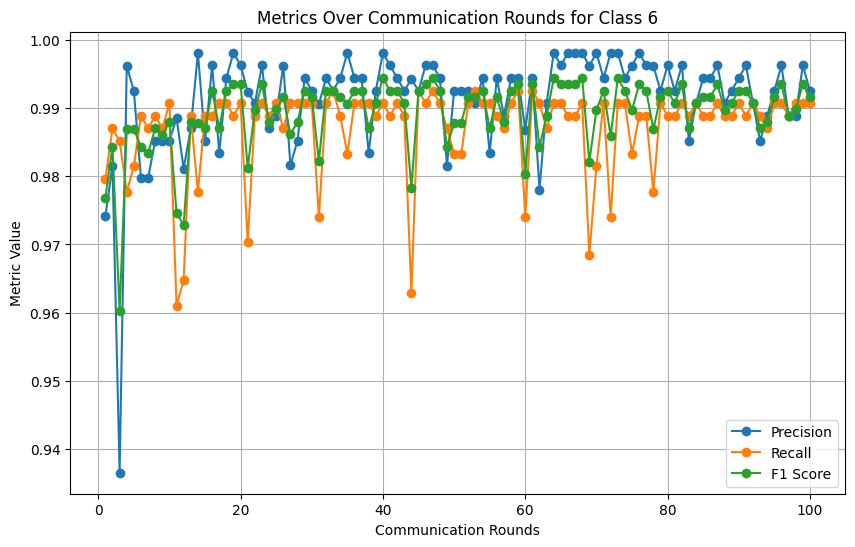

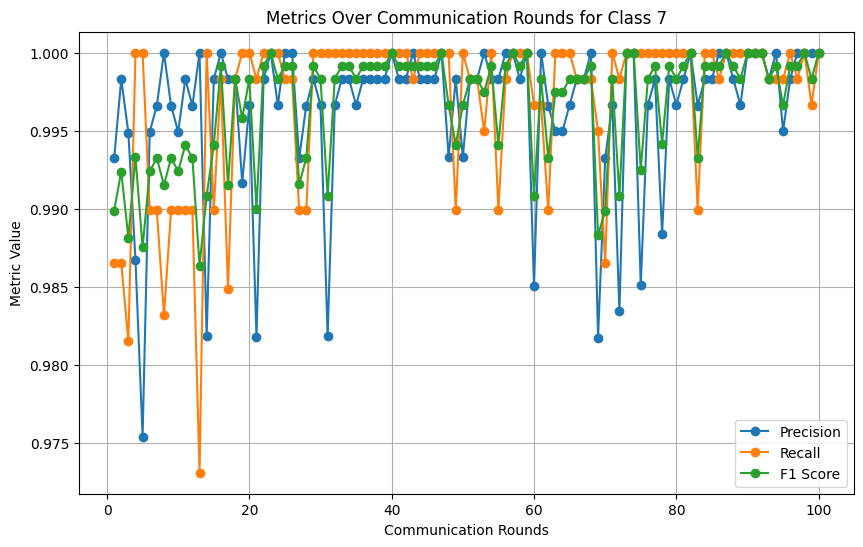

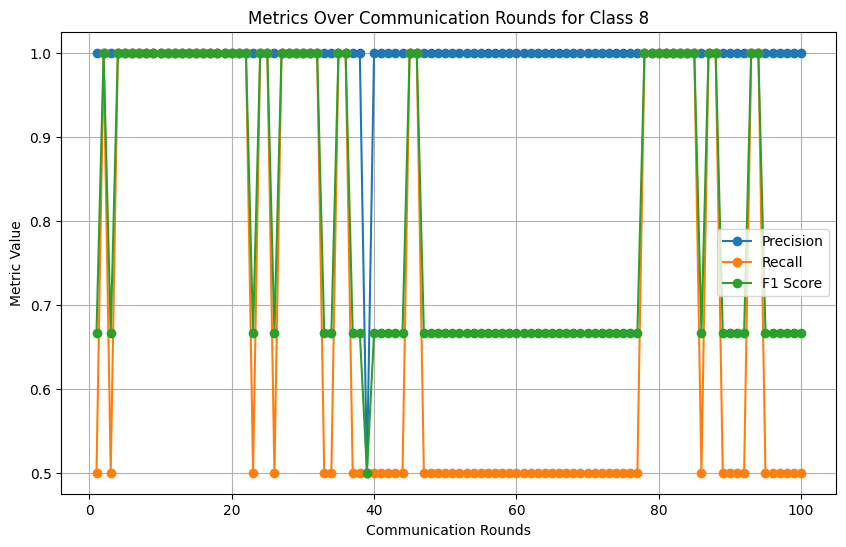

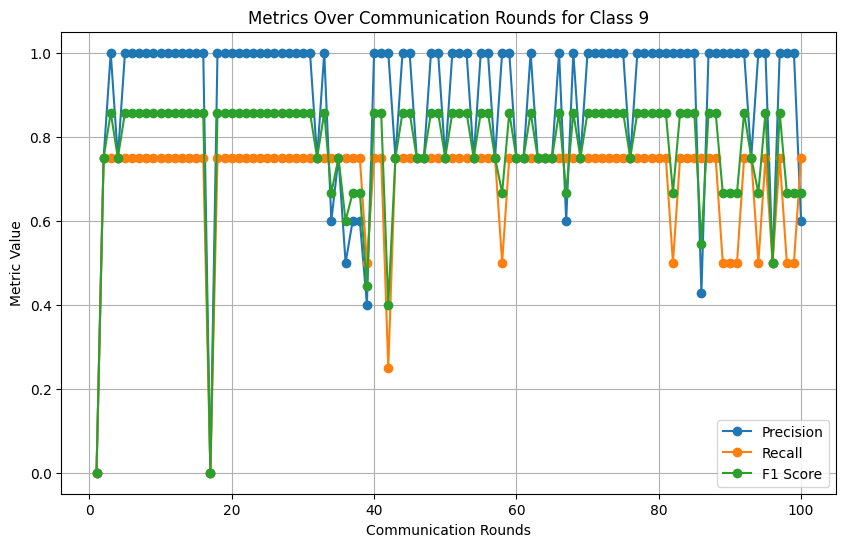

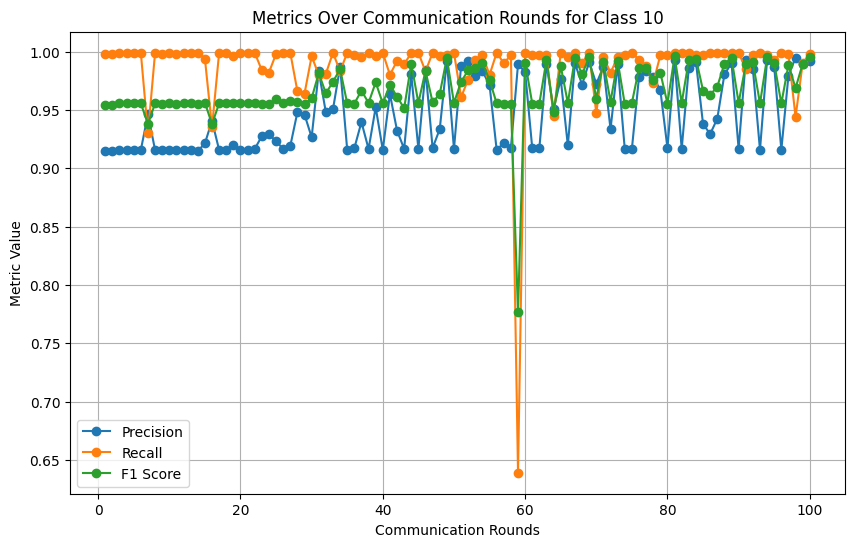

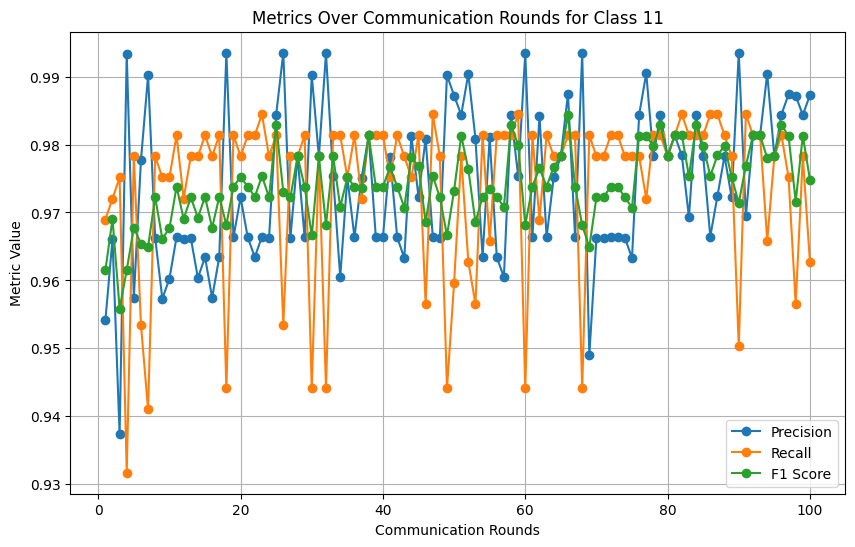

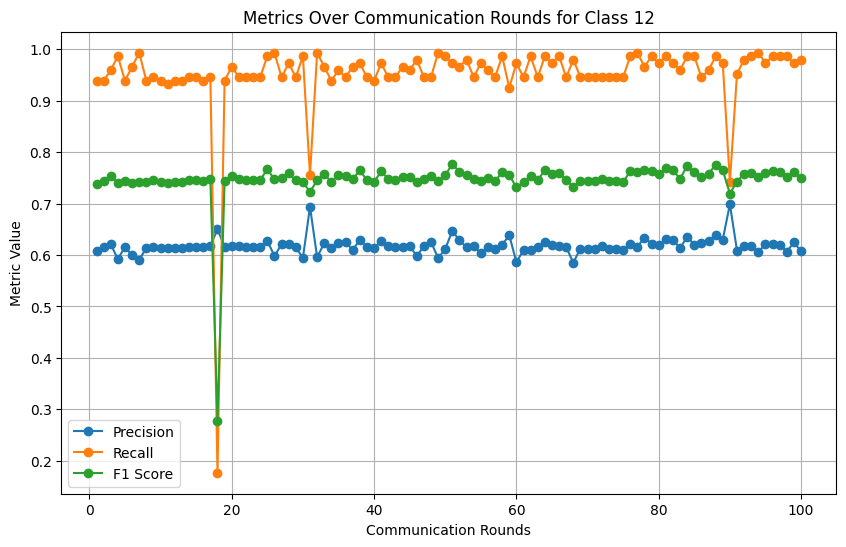

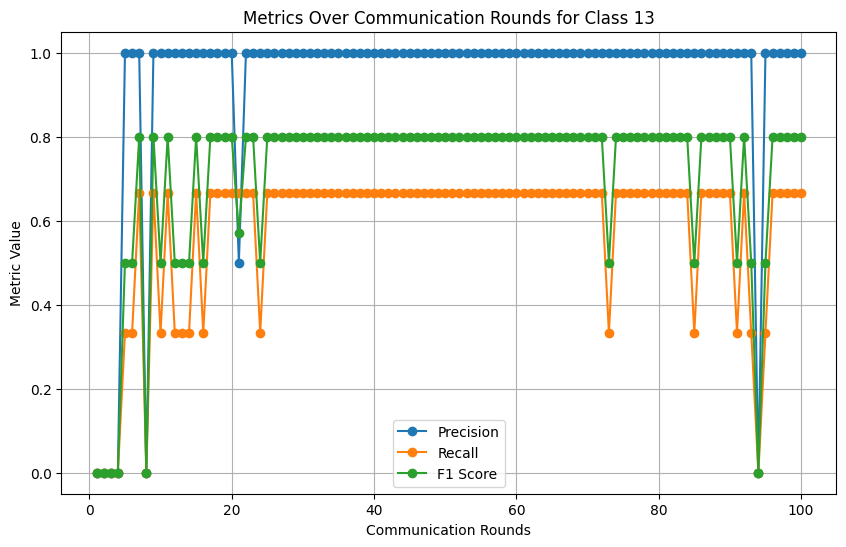

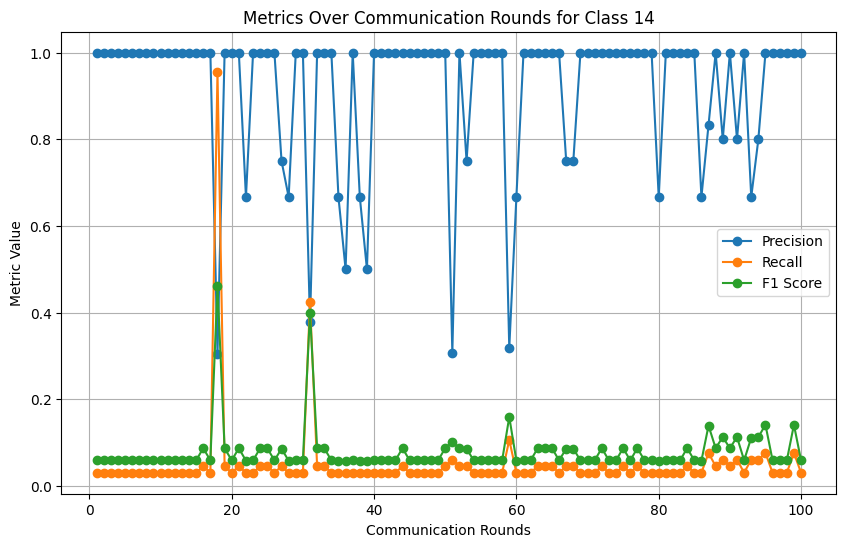

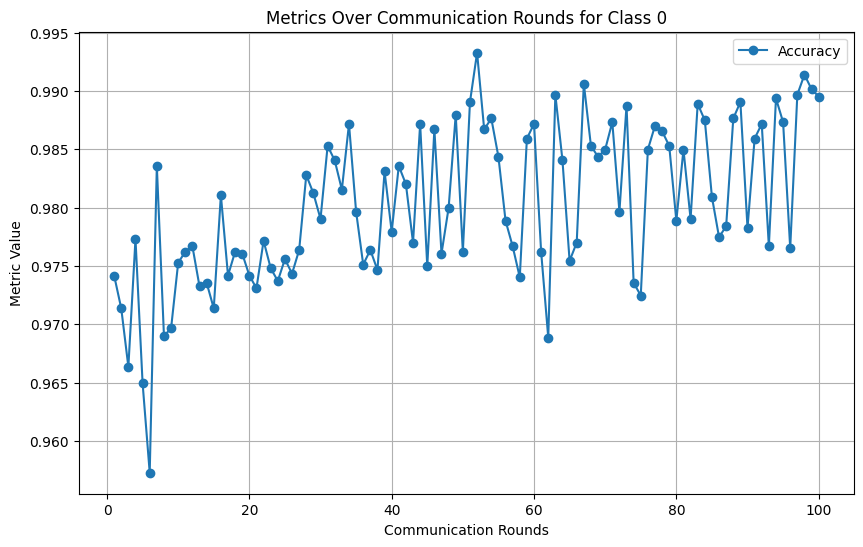

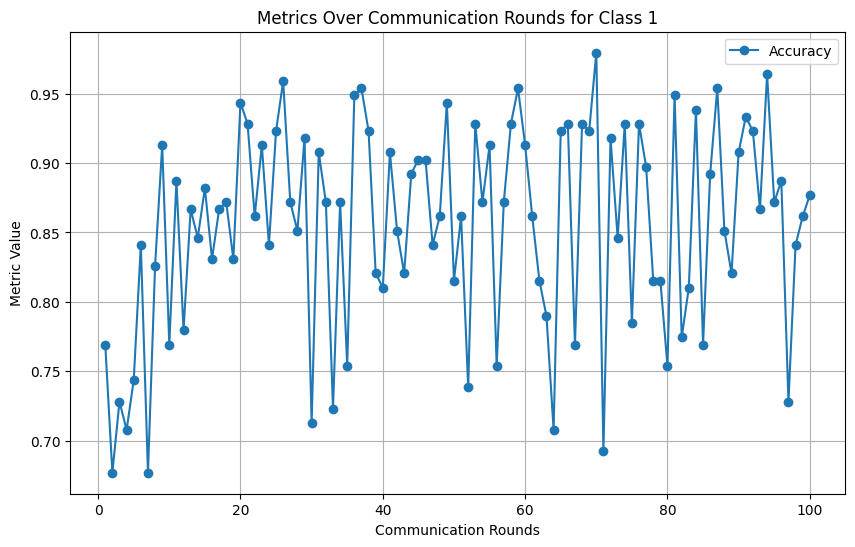

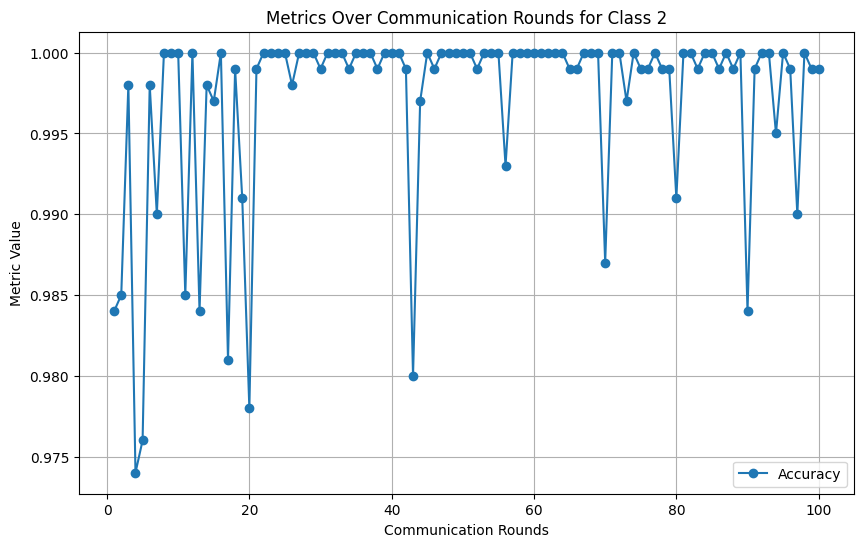

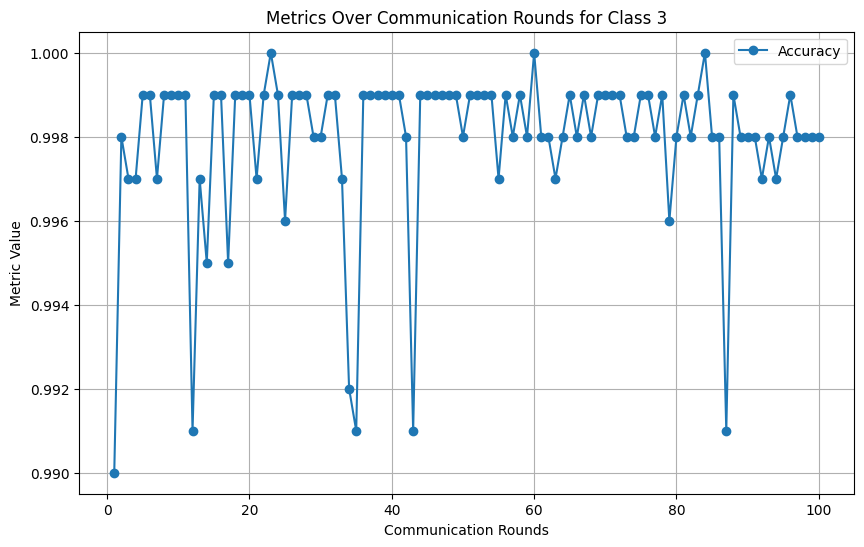

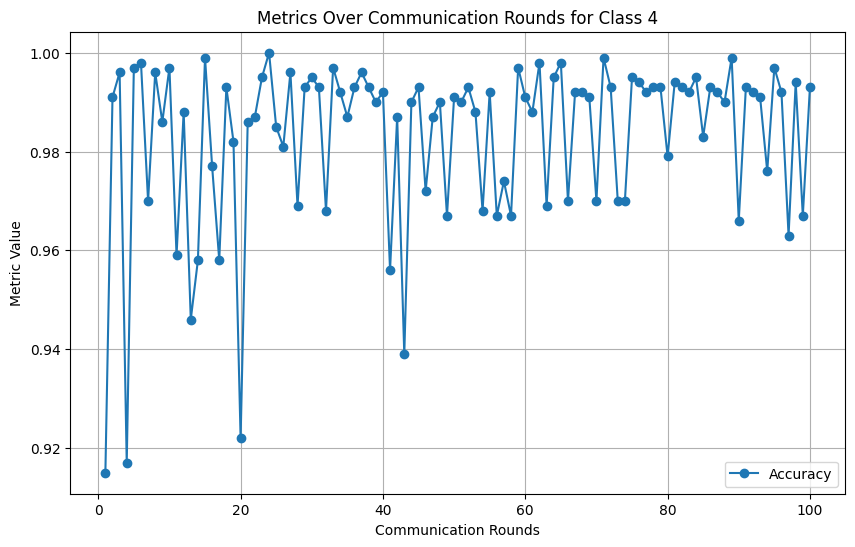

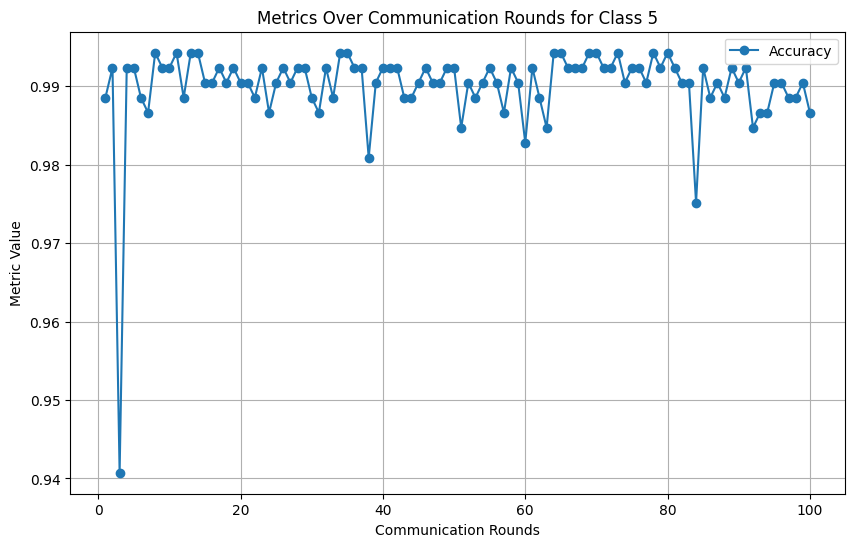

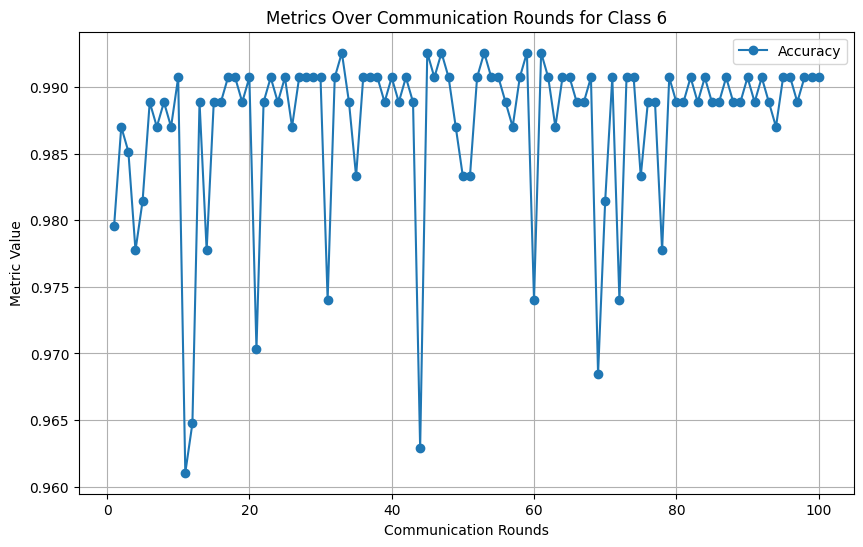

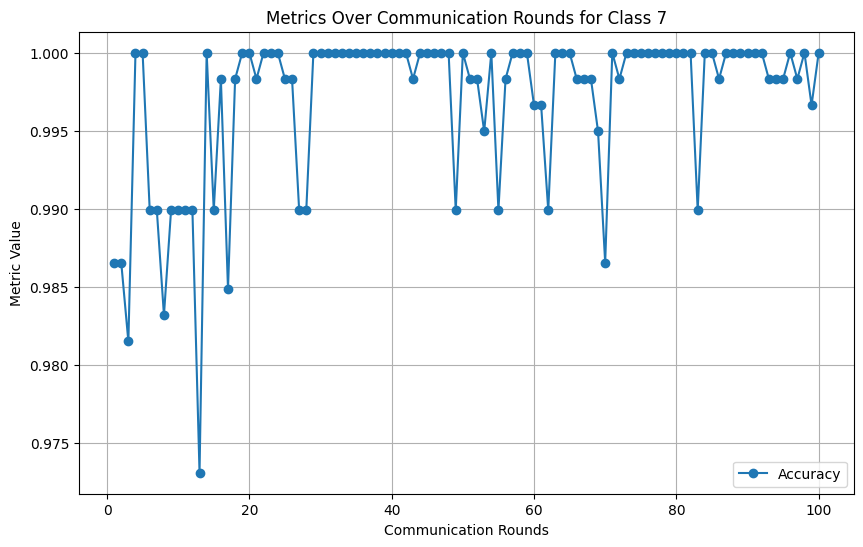

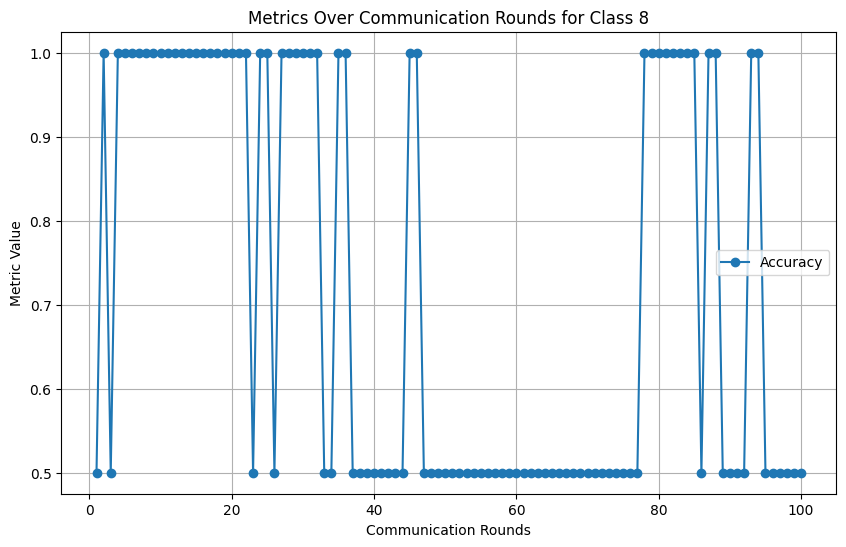

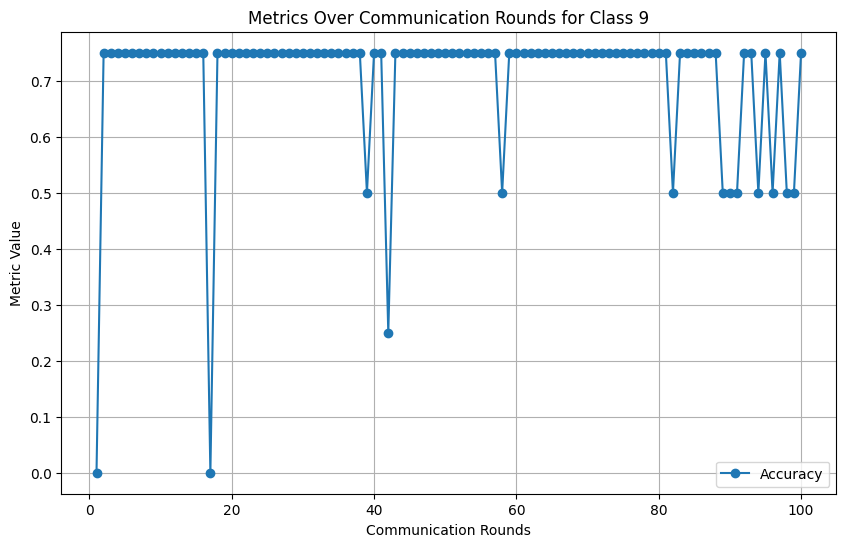

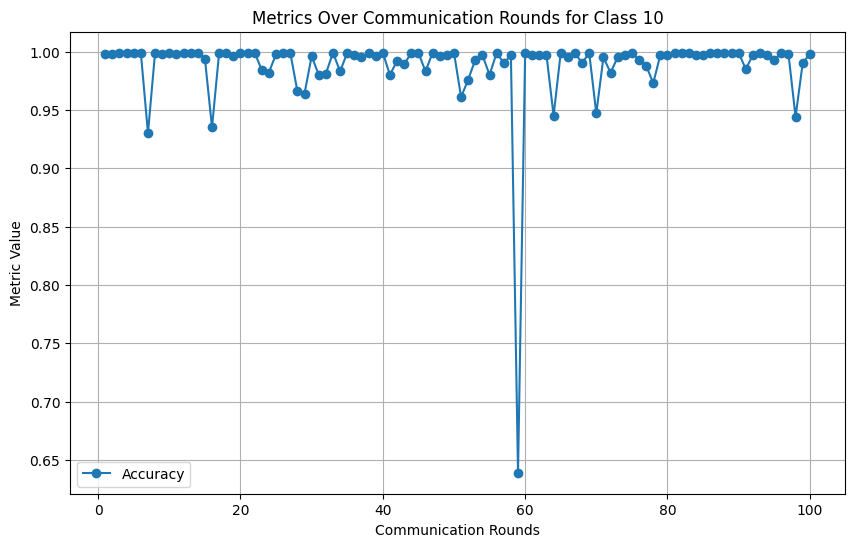

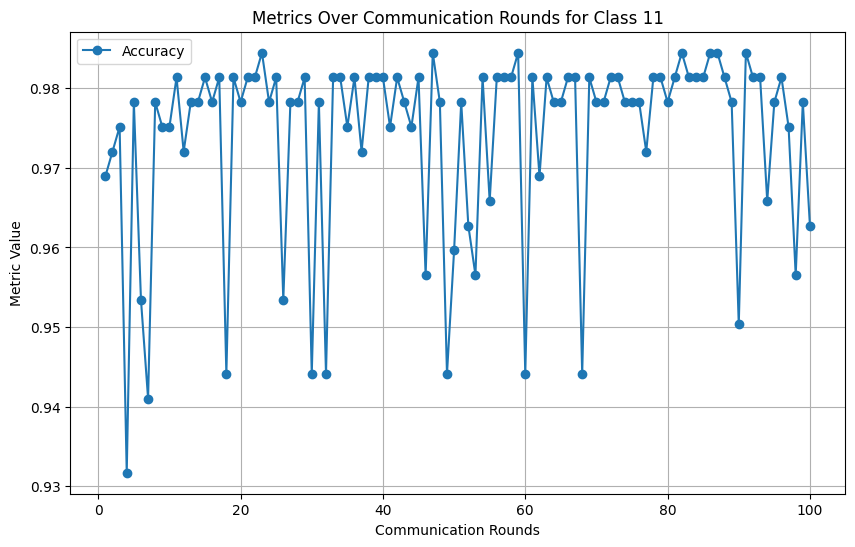

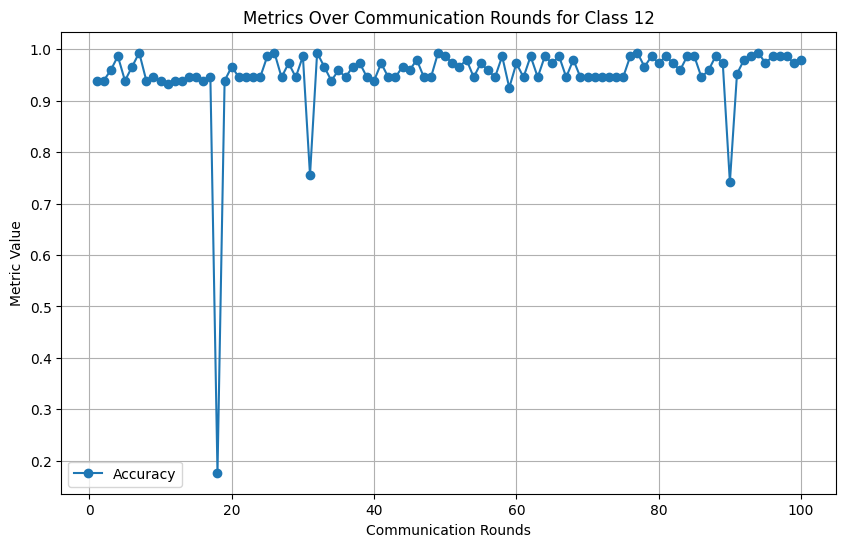

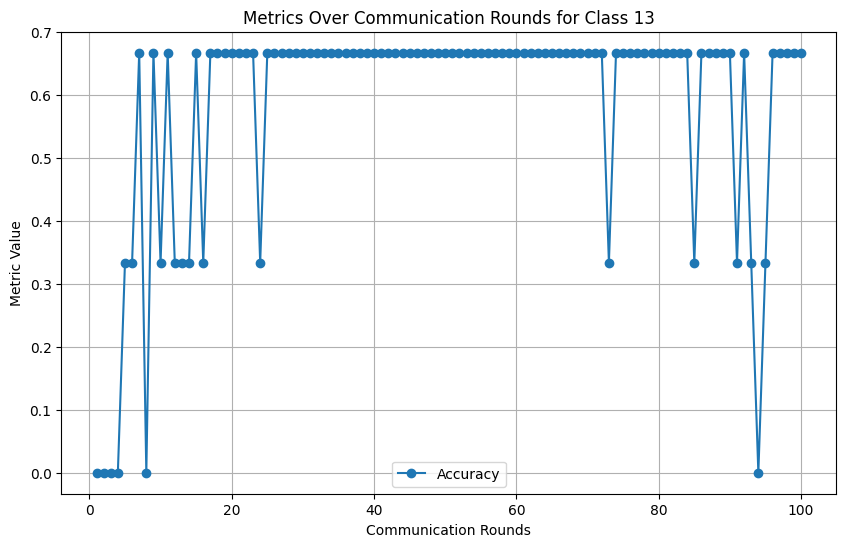

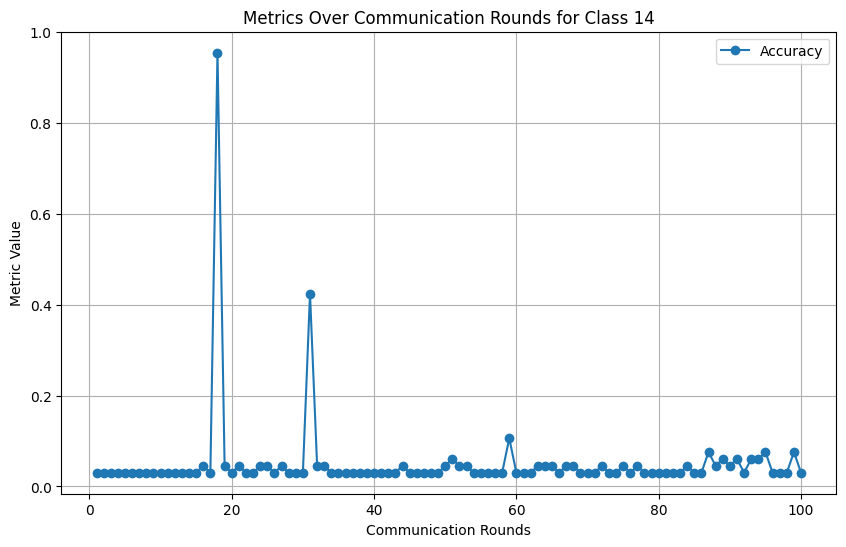

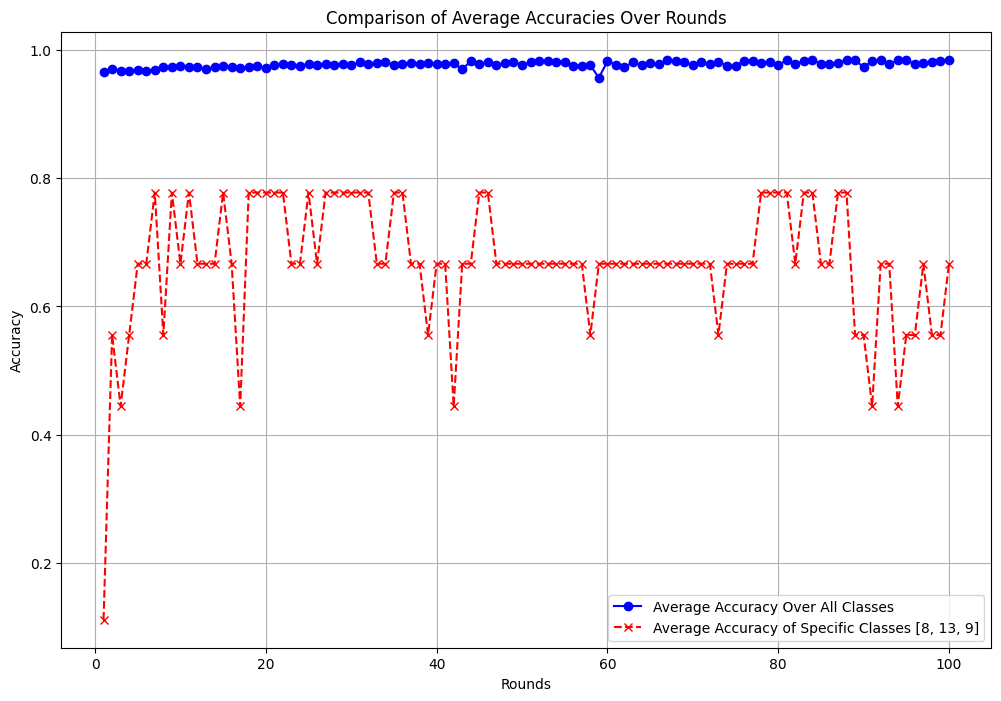

In [21]:
cm

NameError: name 'cm' is not defined